Import required libraries



In [ ]:
# Import required libraries and dataset

import pandas as pd #data processing 
import numpy as np #linear
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #statistical data visualization
import sklearn as sk #machine learning model 
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("heart.csv")
df.shape

Saving heart.csv to heart.csv


(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Data cleaning

In [ ]:
# Data cleaning and preprocessing

# drop null values
df = df.dropna()
# remove unused column
df = df.drop(columns=['oldpeak','slp','caa','thall'])
# rename column names
df.columns = ['age', 'sex', 'chest_pain', 'rest_BP', 'cholesterol', 'fasting_BS', 'rest_ECG', 'max_HR',
       'exercise_angina', 'heart_attack']
df.shape

(303, 10)

Data Exploration

In [ ]:
# Dimension of the dataset
df.shape

(303, 10)

In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              303 non-null    int64
 1   sex              303 non-null    int64
 2   chest_pain       303 non-null    int64
 3   rest_BP          303 non-null    int64
 4   cholesterol      303 non-null    int64
 5   fasting_BS       303 non-null    int64
 6   rest_ECG         303 non-null    int64
 7   max_HR           303 non-null    int64
 8   exercise_angina  303 non-null    int64
 9   heart_attack     303 non-null    int64
dtypes: int64(10)
memory usage: 26.0 KB


In [ ]:
# Preview of the dataset
df.head()

,age,sex,chest_pain,rest_BP,cholesterol,fasting_BS,rest_ECG,max_HR,exercise_angina,heart_attack
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


In [ ]:
# Numerical description of dataset
df.describe()

,age,sex,chest_pain,rest_BP,cholesterol,fasting_BS,rest_ECG,max_HR,exercise_angina,heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,1.000000


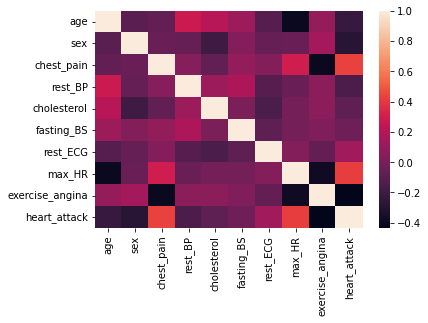

In [ ]:
# Correlation plot
sns.heatmap(df.corr())

Classifier Algorithms:

In [ ]:
# Import the required classifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set feature vector and target variable

X = df.drop('heart_attack', axis = 1)
y = df['heart_attack']

Decision Tree:

In [ ]:
# Decision Tree classifier
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Split the data into a training set and a test set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.2, random_state = 100)

# The classifier will have a random seed of 100 and 3 most levels
dt_classifier = DecisionTreeClassifier(random_state = 100, max_depth = 3)
# Fit classifier to training set
dt_classifier.fit(X_train_dt,y_train_dt)
# Make predction on test set
y_pred_dt = dt_classifier.predict(X_test_dt)

In [ ]:
# Performance accuracy
acc_dt = (accuracy_score(y_test_dt, y_pred_dt) * 100)
# Print the results for Decision Tree algorithm
print("ACCURACY ON VALIDATION SET FOR DECISION TREE:")
print("Performance Accuracy (80:20): {:.2f} %".format(acc_dt))
print("Performance Error: {:.2f} %".format(100-(acc_dt)))
print("Classification Report:")
classifyV_dt = classification_report(y_test_dt, y_pred_dt);
print(classifyV_dt)
print("Confusion Matrix")
confusion_matrixV_dt = pd.crosstab(y_test_dt, y_pred_dt, rownames=['Actual'], colnames=['Predicted'], margins = True)
print (confusion_matrixV_dt)

ACCURACY ON VALIDATION SET FOR DECISION TREE:
Performance Accuracy (80:20): 73.77 %
Performance Error: 26.23 %
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.70      0.75      0.72        28

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Confusion Matrix
Predicted   0   1  All
Actual                
0          24   9   33
1           7  21   28
All        31  30   61


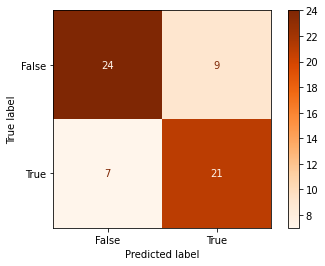

In [ ]:
# Visualize confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_dt,y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='Oranges')
plt.show()

Naive Bayes:


In [ ]:
# Naive Bayes classifier
# import Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Split the data into a training set and a test set
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=100)

# Create the Naive Bayes classifier
nb_classifier = GaussianNB()
# Fit the model to the training set
nb_classifier.fit(X_train_nb, y_train_nb)
# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_nb)

In [ ]:
# Performance accuracy
acc_nb = (accuracy_score(y_test_nb, y_pred_nb) * 100)
# Print the results for Naive Bayes algorithm
print("ACCURACY ON VALIDATION SET FOR NAIVE BAYES:")
print("Performance Accuracy (80:20): {:.2f} %".format(acc_nb))
print("Performance Error: {:.2f} %".format(100-(acc_nb)))
print("Classification Report:")
classifyV_dt = classification_report(y_test_nb, y_pred_nb);
print(classifyV_dt)
print("Confusion Matrix")
confusion_matrixV_dt = pd.crosstab(y_test_nb, y_pred_nb, rownames=['Actual'], colnames=['Predicted'], margins = True)
print (confusion_matrixV_dt)

ACCURACY ON VALIDATION SET FOR NAIVE BAYES:
Performance Accuracy (80:20): 86.89 %
Performance Error: 13.11 %
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Confusion Matrix
Predicted   0   1  All
Actual                
0          27   6   33
1           2  26   28
All        29  32   61


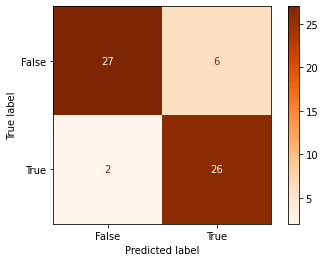

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_nb,y_pred_nb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='Oranges')
plt.show()

Support Vector Machine:

In [ ]:
# Support Vector Machine classifier
# Import SVM model and SVM classifier
from sklearn import svm
from sklearn.svm import SVC

# Split dataset into training and test set with (80:20) ratio
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size = 0.2, random_state = 100)

# Feature scaling
sc = StandardScaler()
sc.fit(X_train_svm)
X_train_svm = sc.transform(X_train_svm)
X_test_svm = sc.transform(X_test_svm)

# Create SVM classifier with linear kernel
svm_classifier = SVC(kernel = 'linear', C = 1.0)
# Train the model using train set
svm_classifier.fit(X_train_svm, y_train_svm)
# Make prediction on test set
y_pred_svm = svm_classifier.predict(X_test_svm)

In [ ]:
# Performance accuracy
acc_svm = (accuracy_score(y_test_svm, y_pred_svm) * 100)
# Print the accuracy results and confusion matrix
print("ACCURACY ON VALIDATION SET FOR SVM:")
print("Performance Accuracy (80:20): {:.2f} %".format(acc_svm))
print("Performance Error: {:.2f} %".format(100-(acc_svm)))
print("Classification Report")

classifyV_dt = classification_report(y_test_svm, y_pred_svm);
print(classifyV_dt)
print("Confusion Matrix:")
confusion_matrixV_dt = pd.crosstab(y_test_svm, y_pred_svm, rownames=['Actual'], colnames=['Predicted'], margins = True)
print (confusion_matrixV_dt)

ACCURACY ON VALIDATION SET FOR SVM:
Performance Accuracy (80:20): 83.61 %
Performance Error: 16.39 %
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
Predicted   0   1  All
Actual                
0          27   6   33
1           4  24   28
All        31  30   61


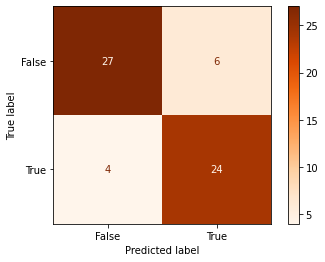

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_svm,y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='Oranges')
plt.show()

Random Forest:

In [ ]:
# Random Forest classifier
# Import Random Forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Split the data into a training set and a test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y, test_size = 0.2, random_state = 100)

# rf_classifier = RandomForestRegressor(n_estimators=100)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 100)

# fit(method) is used to train the random forest on dataset
rf_classifier.fit(X_train_rf,y_train_rf)

# predict() make predictions on new data
y_pred_rf = rf_classifier.predict(X_test_rf)

In [ ]:
# Performance accuracy
acc_rf = (accuracy_score(y_test_rf, y_pred_rf) * 100)
# Print the accuracy results and confusion matrix
print("ACCURACY ON VALIDATION SET FOR RANDOM FOREST:")
print("Performance Accuracy (80:20): {:.2f} %".format(acc_rf))
print("Performance Error: {:.2f} %".format(100-(acc_rf)))
print("Classification Report")
classifyV_dt = classification_report(y_test_rf, y_pred_rf);
print(classifyV_dt)
print("Confusion Matrix:")
confusion_matrixV_dt = pd.crosstab(y_test_rf, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins = True)
print(confusion_matrixV_dt)

ACCURACY ON VALIDATION SET FOR RANDOM FOREST:
Performance Accuracy (80:20): 81.97 %
Performance Error: 18.03 %
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
Predicted   0   1  All
Actual                
0          26   7   33
1           4  24   28
All        30  31   61


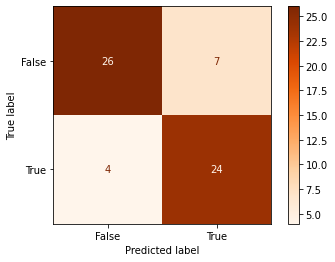

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_rf,y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='Oranges')
plt.show()

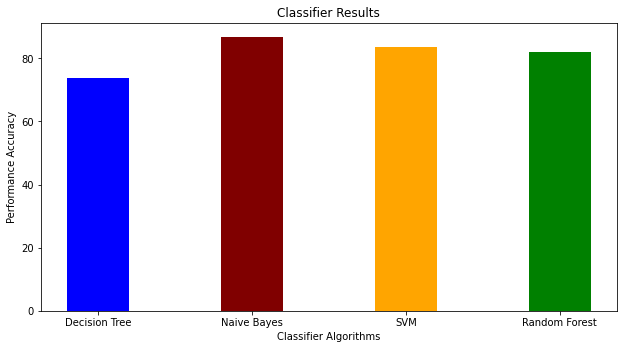

In [ ]:
# Bar plot for summary
fig = plt.figure(figsize = (8, 4))
ax = fig.add_axes([0,0,1,1])
classifier = ['Decision Tree', 'Naive Bayes', 'SVM', 'Random Forest']
acc = [acc_dt,acc_nb,acc_svm,acc_rf]
c = ['Blue', 'Maroon','Orange','Green']
ax.bar(classifier, acc, color = c, width = 0.4)
plt.xlabel("Classifier Algorithms")
plt.ylabel("Performance Accuracy")
plt.title("Classifier Results")
plt.show()